In [1]:
import gluonbook as gb
from mxnet import gluon,image,nd
from mxnet.gluon import utils as gutils
import os

import numpy as np

In [10]:
if not os.path.exists('../data/pikachu/'):
    os.system('curl https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/dataset/pikachu/train.rec -o ../data/pikachu/train.rec')
    os.system('curl https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/dataset/pikachu/val.rec -o ../data/pikachu/val.rec')
    os.system('curl https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/dataset/pikachu/train.idx -o ../data/pikachu/train.idx')

In [10]:
batch_size,img_size=32,256
test_iter=image.ImageDetIter(path_imgrec='../data/pikachu/val.rec',batch_size=batch_size,data_shape=(3,img_size,img_size),shuffle=False)
train_iter=image.ImageDetIter(path_imgrec='../data/pikachu/train.rec',path_imgidx='../data/pikachu/train.idx',batch_size=batch_size,data_shape=(3,img_size,img_size),shuffle=True,rand_crop=1,min_object_covered=0.95,max_attempts=200)
batch_data=train_iter.next()
batch_data.data[0].shape,batch_data.label[0].shape

((32, 3, 256, 256), (32, 1, 5))

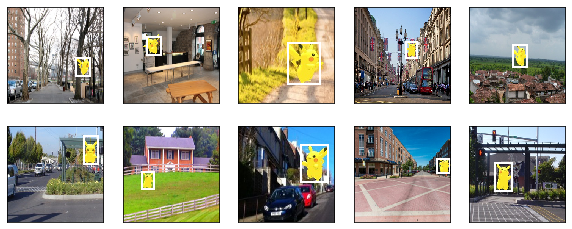

In [8]:
imgs=batch_data.data[0][:10].transpose((0,2,3,1)).clip(0,255)/255
axes=gb.show_images(imgs,2,5).flatten()
for ax,label in zip(axes,batch_data.label[0][:10]):
    gb.show_bboxes(ax,[label[0,1:]*img_size],colors=['w'])